# KNN을 사용한 IRIS 데이터

08-분류를 참고해 IRIS 데이터를 분류, 분석

## #01. 패키지

In [1]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# KNN 분류를 위한 패키지
from sklearn.neighbors import KNeighborsClassifier

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

# 분류 결과 판정을 위한 패키지
from sklearn import metrics

## #02. 데이터

In [2]:
origin = read_excel("https://data.hossam.kr/G02/iris.xlsx")
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
origin.shape

(150, 5)

In [5]:
# origin.groupby('Species').size
origin['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## #03. 데이터 분포 확인

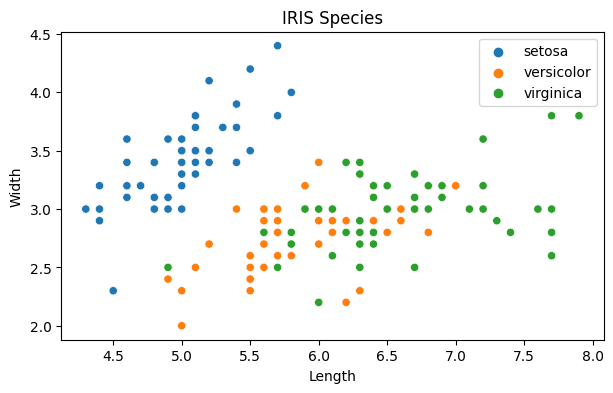

In [6]:
plt.figure(figsize=(7,4))
sb.scatterplot(data=origin, x='Sepal.Length', y='Sepal.Width', hue='Species')
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("IRIS Species")

# 필요하면 새로운 데이터를 투입

plt.legend()
plt.show()
plt.close()

## #04. KNN 분류 모델 구성

### 종속변수 라벨링

In [7]:
df = origin.copy()
df['Species'] = df['Species'].map({"setosa":0,
                                   "versicolor":1,
                                   "virginica":2})
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 독립/종속변수 분리

In [10]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [26]:
# x = df.drop(['Petal.Length', 'Petal.Width', 'Species'], axis=1) #변수가 많을 때는 []로 묶을 것
x = df.drop(['Petal.Length', 'Petal.Width', 'Species'], axis=1)
x.head()    #데이터프레임

,Sepal.Length,Sepal.Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [27]:
y = df['Species']  # 차원 맞춤
y.head()    #Series 객체

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### 분류모델 구성

In [28]:
# 근접 이웃의 수를 3으로 설정
k = 3

# 모델 구성
knn = KNeighborsClassifier(n_neighbors=k)

# 모델 학습
fit = knn.fit(x, y)
fit

KNeighborsClassifier(n_neighbors=3)

### 학습 결과 확인

In [29]:
y_pred = knn.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int64)

### 새로운 데이터 투입

In [35]:
# 배열은 2차, DF는 1차
# sklearn에 배열 데이터를 전달할 경우 2차원으로 구성
newdata_length = [4.5]
newdata_width = [3.5]
new_data = [[newdata_length[0], newdata_width[0]]]

In [36]:
iris_classes = {0:"setosa", 1:"versicolor", 2:"virginica"}

new_pred = knn.predict(new_data)

print('데이터:', new_data, "예측:", iris_classes[new_pred[0]])
# 변수 이름을 안 알려줘서 경고가 발생

데이터: [[4.5, 3.5]] 예측: setosa


c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### KNN에서 이웃한 데이터 얻기

In [37]:
value, indexs = knn.kneighbors(new_data, k)

# 거리
print("데이터 값:", value)    #데이터 값

# index
print("인덱스:", indexs)    #데이터 index

데이터 값: [[0.14142136 0.14142136 0.31622777]]
인덱스: [[ 6 22 47]]


c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### 이웃의 실제 데이터 확인

In [38]:
neighbor_data = origin.values[indexs]
neighbor_data

array([[[4.6, 3.4, 1.4, 0.3, 'setosa'],
        [4.6, 3.6, 1.0, 0.2, 'setosa'],
        [4.6, 3.2, 1.4, 0.2, 'setosa']]], dtype=object)

In [39]:
print(neighbor_data[0])
print(neighbor_data[0][0])

[[4.6 3.4 1.4 0.3 'setosa']
 [4.6 3.6 1.0 0.2 'setosa']
 [4.6 3.2 1.4 0.2 'setosa']]
[4.6 3.4 1.4 0.3 'setosa']


### 분류 결과 시각화

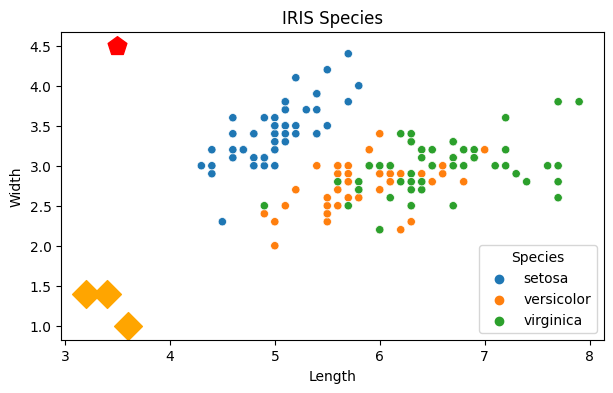

In [43]:
plt.figure(figsize=(7,4))
sb.scatterplot(data=origin, x='Sepal.Length', y='Sepal.Width', hue='Species')
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("IRIS Species")

# 새로운 데이터 투입
# newdata_length = [59]
# newdata_height = [35]
plt.scatter(newdata_width, newdata_length, marker="p", s=200, c="r", label='new data')

# 근접 이웃 표시
for i, v in enumerate(neighbor_data[0]):
    plt.scatter(v[1], v[2],marker="D", s=200, c='orange', label='neighbor')
# 0번째는 강아지 종류(d, j)
# length, height의 축이 바뀌면 v[1], v[2]의 위치를 변경

plt.show()
plt.close()